In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib.pylab as pl

In [3]:
base_path = '/home/jez/Bias_Correction/'

ds = xr.open_dataset(f'{base_path}data/ProcessedData/NST_Observations.nc')
ds_subset = xr.open_dataset(f'{base_path}data/ProcessedData/NST_Observations_Subset.nc')

ds = ds.set_coords(("Year", "Day_of_Month"))
ds = ds.sel(Month=1)
ds_subset = ds_subset.set_coords(("Year", "Day_of_Month"))


In [10]:
df = ds['Temperature()'].to_dataframe().reset_index()
da_count = df.groupby(['Station_Lower','Year']).count()['Temperature()'].to_xarray()
da_count['Station_Lower']=np.arange(0,len(da_count['Station_Lower']),1)
da_count = da_count.rename('Days in Month').rename({'Station_Lower':'Station'})

df_subset = ds_subset['Temperature()'].to_dataframe().reset_index()
da_subset_count = df_subset.groupby(['Station_Lower','Year']).count()['Temperature()'].to_xarray()
da_subset_count['Station_Lower']=np.arange(0,len(da_subset_count['Station_Lower']),1)
da_subset_count = da_subset_count.rename('Days in Month').rename({'Station_Lower':'Station'})

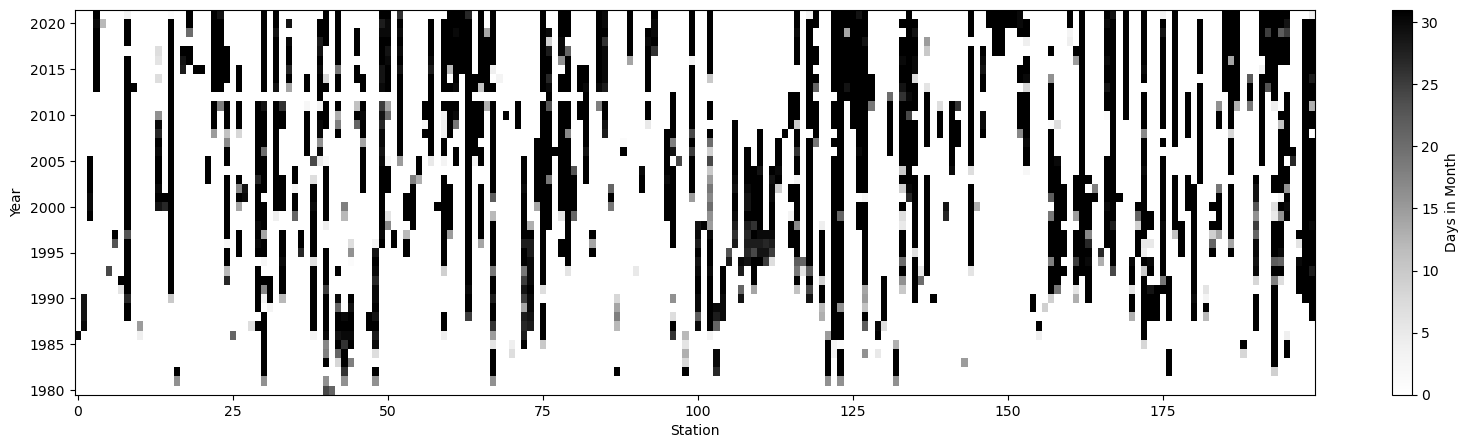

In [5]:
plt.figure(figsize=(20,5))
da_count.plot(x='Station',cmap=plt.cm.Greys)


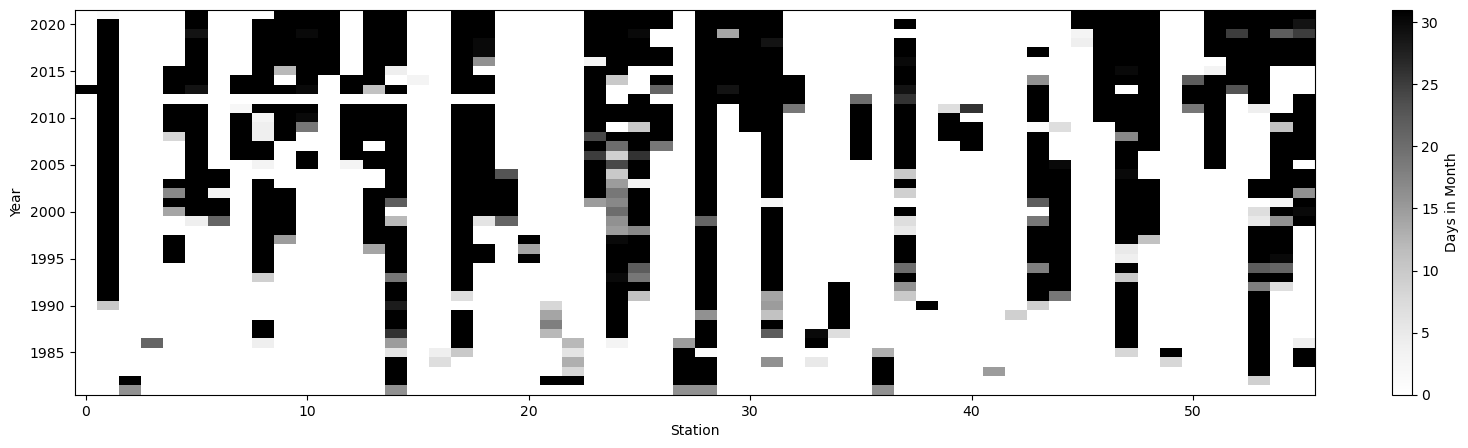

In [6]:
plt.figure(figsize=(20,5))
da_subset_count.plot(x='Station',cmap=plt.cm.Greys)

In [29]:
df_subset = ds_subset['Temperature()'].to_dataframe().reset_index()
da_subset_mean = df_subset.groupby(['Station_Lower','Year']).mean()['Temperature()'].to_xarray()
da_subset_mean['Station_Lower']=np.arange(0,len(da_subset_mean['Station_Lower']),1)
da_subset_mean = da_subset_mean.rename('Mean Temperature').rename({'Station_Lower':'Station'})

/tmp/ipykernel_14574/4159501493.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  da_subset_mean = df_subset.groupby(['Station_Lower','Year']).mean()['Temperature()'].to_xarray()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


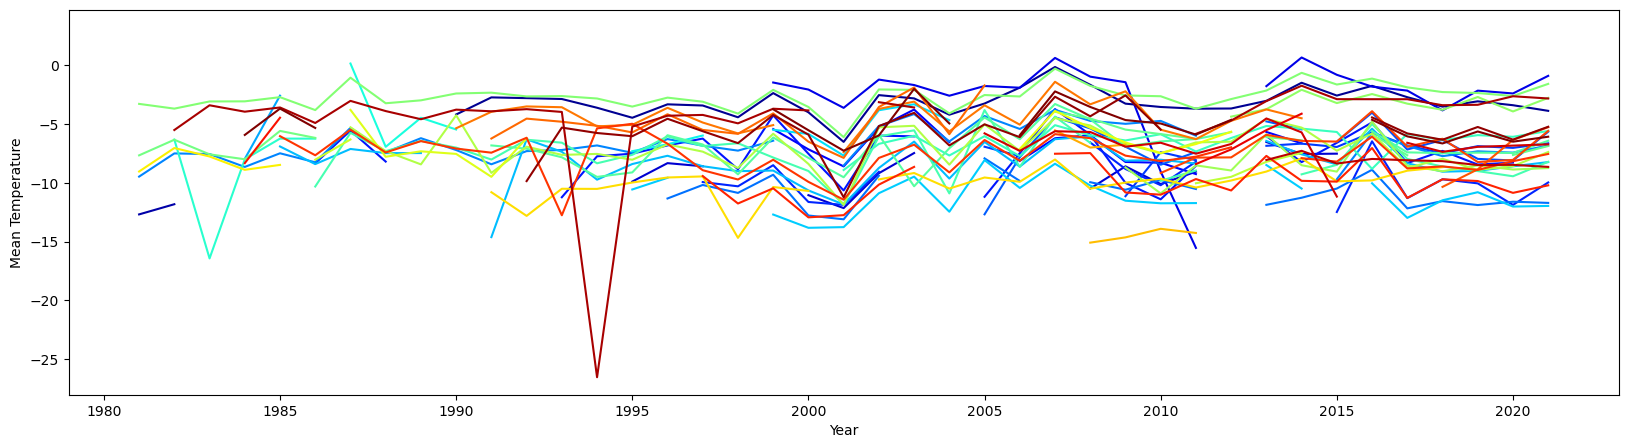

In [30]:
colors = pl.cm.jet(np.linspace(0,1,56))
custom_cycler = cycler(color=colors) #or simply color=colorlist

plt.figure(figsize=(20,5))
ax = plt.gca()
ax.set_prop_cycle(custom_cycler)
da_subset_mean.plot(ax=ax,hue='Station')
plt.legend().remove()
plt.show()

In [31]:
ds_subset

<xarray.Dataset>
Dimensions:        (Station_Lower: 56, Day: 1302)
Coordinates:
  * Station_Lower  (Station_Lower) object 'alexander-tt' ... 'windless-bight'
    Month          float64 1.0
  * Day            (Day) int64 0 1 2 3 4 5 6 ... 1296 1297 1298 1299 1300 1301
    Year           (Station_Lower, Day) float64 2.012e+03 2.012e+03 ... nan nan
    Day_of_Month   (Station_Lower, Day) float64 1.0 2.0 3.0 4.0 ... nan nan nan
    Lat(°C)        (Station_Lower) float64 -79.0 -76.72 -77.6 ... -77.87 -77.73
    Lon(°C)        (Station_Lower) float64 170.8 163.0 161.1 ... 166.9 167.7
    Elevation(m)   (Station_Lower) float64 55.0 150.0 1.75e+03 ... 9.0 40.0
    Institution    (Station_Lower) object 'AMRC' 'PNRA' 'AMRC' ... 'AMRC' 'AMRC'
Data variables:
    Temperature()  (Station_Lower, Day) float64 nan nan nan nan ... nan nan nan